In [1]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.optimizers import Adam
from glob import glob
import matplotlib.pyplot as plt

In [2]:
train_path = 'Datasets/train'
valid_path = 'Datasets/test'
folders = glob('Datasets/train/*')

In [3]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu", input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu", input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=len(folders), activation="softmax"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        1

In [4]:
# Use the Image Data Generator to import the images from the dataset

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')                                            


Found 5725 images belonging to 3 classes.
Found 680 images belonging to 3 classes.


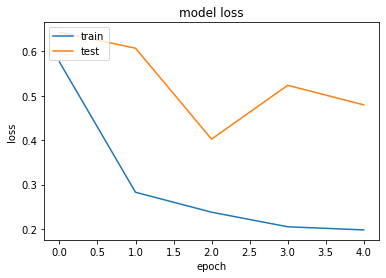

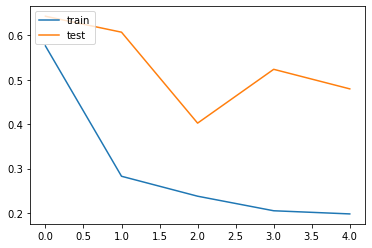

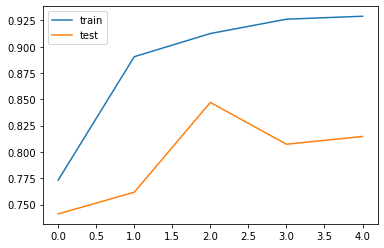

In [7]:
# plotting training set and validation test 
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('TRAIN_VAL_1.png')
plt.show()

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('LossVal_loss_1.png')
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('AccVal_acc_1.png')
plt.show()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=[checkpointer], 
  verbose=1
)

In [13]:
model.save('model_vgg16.h5')

In [16]:
from keras.models import load_model
from keras.preprocessing import  image
from keras.models import model_from_json
from keras.applications.vgg16 import preprocess_input
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
import keras
import os

In [17]:
model = load_model('model_vgg16.h5')
test_folder = os.getcwd() + '\Datasets'+'\\val'

In [18]:
def folderEncoder(folderName):
    if folderName=='COVID':
        return 0
    elif folderName=="NORMAL":
        return 1
    elif folderName=='PNEUMONIA':
        return 2
    else:
        return None

              precision    recall  f1-score   support

       COVID       0.42      1.00      0.59         8
      NORMAL       0.70      0.39      0.50        18
   PNEUMONIA       0.80      0.50      0.62         8

    accuracy                           0.56        34
   macro avg       0.64      0.63      0.57        34
weighted avg       0.66      0.56      0.55        34



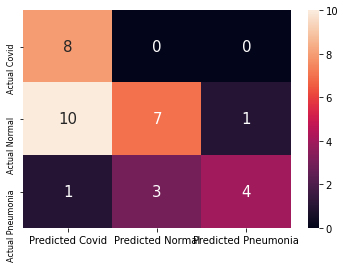

In [19]:
result=[]
for folder1 in os.listdir(test_folder):
    y_true=folderEncoder(folder1)
    for filename in os.listdir(os.path.join(test_folder,folder1)):
#         print(filename)
        img = image.load_img(os.path.join(os.path.join(test_folder,folder1),filename), target_size=(224, 224))
        x = image.img_to_array(img)
#         x = x / 255
        x = np.expand_dims(x, axis=0)
        img_data = preprocess_input(x)
        y_pred=model.predict(img_data)
#         y_pred=loaded_model.predict(img_data)
        y_pred=np.argmax(y_pred, axis=1)
        result.append([y_true,y_pred[0]])

y_pred=y_true=[] #empty list for placeholder

y_true=[y[0] for y in result] # separating true classes
y_pred=[y[1] for y in result] # separating predicted classes
# print(y_true,y_pred)

target_classes = ['COVID','NORMAL','PNEUMONIA'] 

print(classification_report(y_true, y_pred, target_names=target_classes))
# print(accuracy_score(y_true, y_pred))


cm = pd.DataFrame(data=confusion_matrix(y_true, y_pred, labels=[0, 1, 2]),index=["Actual Covid","Actual Normal", "Actual Pneumonia"],
columns=["Predicted Covid","Predicted Normal", "Predicted Pneumonia"])
sns_plot = sns.heatmap(cm,annot=True,fmt="d",annot_kws={'size': 15})
plt.xticks(rotation=0)
plt.yticks(fontsize = 8)
plt.show()
sns_plot.figure.savefig("output.png")

In [21]:
import tensorflow as tf
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt #For Visualization
import pandas as pd             # For handling data

In [22]:
model = load_model('model_vgg16.h5')
name =['COVID','NORMAL','PNEUMONIA']

# results
for i in name:
    print('------------------------'+str(i)+'-------------------------')
    dir1 = os.getcwd()
    dir2 = str(dir1) +'\Datasets'+'\\val'+f'\\{i}'
    dir_arr = os.listdir(dir2)
    # print(dir_arr)
    for test_image in dir_arr:
        test_image1 = str(dir1) +'\Datasets'+'\\val'+f'\\{i}\\' + str(test_image)
        img = image.load_img(test_image1, target_size=(224,224))
        x = image.img_to_array(img)
        x= np.expand_dims(x, axis=0)
        img_data = preprocess_input(x)
        classes = model.predict(img_data)
        y_pred=np.argmax(classes, axis=1)
        prediction = name[y_pred[0]]
        print(prediction,classes,test_image)

------------------------COVID-------------------------
COVID [[1. 0. 0.]] 270_2020_2470_Fig1_HTML-b.png
COVID [[1. 0. 0.]] 296_2020_4584_Fig2_HTML-a.png
COVID [[1. 0. 0.]] 296_2020_4584_Fig2_HTML-b.png
COVID [[1. 0. 0.]] 296_2020_4584_Fig2_HTML-c.png
COVID [[1. 0. 0.]] 396A81A5-982C-44E9-A57E-9B1DC34E2C08.jpeg
COVID [[1. 0. 0.]] 436a6348.jpg
COVID [[1. 0. 0.]] 441c9cdd.jpg
COVID [[1. 0. 0.]] 446B2CB6-B572-40AB-B01F-1910CA07086A.jpeg
------------------------NORMAL-------------------------
NORMAL [[0.0000000e+00 1.0000000e+00 1.5144874e-23]] IM-0119-0001 (1).jpeg
NORMAL [[0.0000000e+00 1.0000000e+00 1.5144874e-23]] IM-0119-0001.jpeg
NORMAL [[0. 1. 0.]] IM-0122-0001 (1).jpeg
NORMAL [[0. 1. 0.]] IM-0122-0001.jpeg
COVID [[1. 0. 0.]] IM-0125-0001 (1).jpeg
COVID [[1. 0. 0.]] IM-0125-0001.jpeg
COVID [[1.0000000e+00 1.0721771e-29 0.0000000e+00]] IM-0127-0001 (1).jpeg
COVID [[1.0000000e+00 1.0721771e-29 0.0000000e+00]] IM-0127-0001.jpeg
COVID [[1. 0. 0.]] IM-0128-0001 (1).jpeg
COVID [[1. 0. 0.]]

COVID [[1. 0. 0.]] covid1.png


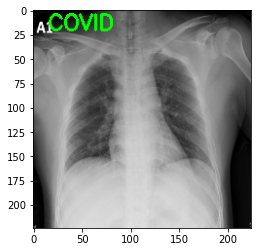

In [33]:
import cv2
import matplotlib.pyplot as plt

model = load_model('model_vgg16.h5')
name =['COVID','NORMAL','PNEUMONIA']

test_image='covid1.png'
output_image='output_image.png'
test_image1 = str(test_image)

#Prediction
img = image.load_img(test_image1, target_size=(224,224))
x = image.img_to_array(img)
x= np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
y_pred=np.argmax(classes, axis=1)
prediction = name[y_pred[0]]
print(prediction,classes,test_image)

#show image
im = cv2.imread(test_image)
im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)
label_position = (15,20)
cv2.putText(im_resized,prediction,label_position,cv2.FONT_HERSHEY_SIMPLEX,0.75,(0,255,0),2)
cv2.imwrite(output_image,im_resized)
plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.show()
